<a href="https://colab.research.google.com/github/EmamulHossen/Statistics-For-Data-Science/blob/main/statistics_for_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Statistics?**
Statistics is a set of mathematical methods and tools that enable us to answer important questions about data. It is divided into two categories:

>**Descriptive Statistics** - this offers methods to summarise data by transforming raw observations into meaningful information that is easy to interpret and share.

> **Inferential Statistics** - this offers methods to study experiments done on small samples of data and chalk out the inferences to the entire population (entire domain).

Now, statistics and machine learning are two closely related areas of study. Statistics is an important prerequisite for applied machine learning, as it helps us select, evaluate and interpret predictive models.


# **Statistics and Machine Learning**
The core of machine learning is centered around statistics. You can’t solve real-world problems with machine learning if you don’t have a good grip of statistical fundamentals.

There are certainly some factors that make learning statistics hard. I'm talking about mathematical equations, greek notation, and meticulously defined concepts that make it difficult to develop an interest in the subject.




We can address these issues with simple and clear explanations, appropriately paced tutorials, and hands-on labs to solve problems with applied statistical methods.

From exploratory data analysis to designing hypothesis testing experiments, statistics play an integral role in solving problems across all major industries and domains.

Anyone who wishes to develop a deep understanding of machine learning should learn how statistical methods form the foundation for regression algorithms and classification algorithms, how statistics allow us to learn from data, and how it helps us extract meaning from unlabeled data.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Modules**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data**

**To create a boxplot using the Seaborn library**

<Axes: >

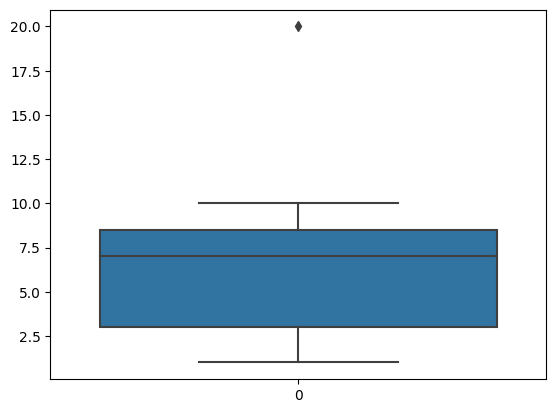

In [3]:
data=[1,2,3,3,5,7,7,8,9,10,20] #The data was collected randomly in order to create a boxplot.
sns.boxplot(data=data)

**One data point stands out as an outlier**

{'whiskers': [<matplotlib.lines.Line2D at 0x790dfe2712d0>,
 'caps': [<matplotlib.lines.Line2D at 0x790dfe271810>,
 'boxes': [<matplotlib.lines.Line2D at 0x790dfe271150>],
 'medians': [<matplotlib.lines.Line2D at 0x790dfe271d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x790dfe271ff0>],
 'means': []}

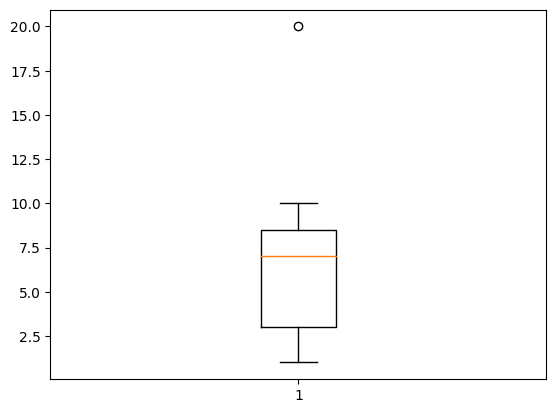

In [4]:
fig,ax=plt.subplots()#To create a boxplot using the matplotlib library,
ax.boxplot(data)

# **Load another data**

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df1=df.copy()

# **What are quartiles?**
Quartiles are a set of **descriptive statistics**. They summarize the central tendency and variability of a dataset or distribution.

Quartiles are a type of **percentile**. A percentile is a value with a certain percentage of the data falling below it. In general terms, k% of the data falls below the kth percentile.

>The **first quartile** (Q1, or the lowest quartile) is the 25th percentile, meaning that 25% of the data falls below the first quartile.

>The **second quartile** (Q2, or the median) is the 50th percentile, meaning that 50% of the data falls below the second quartile.

> The **third quartile** (Q3, or the upper quartile) is the 75th percentile, meaning that 75% of the data falls below the third quartile.







In [7]:
Q1=df["Height"].quantile(0.25) #First quartle
Q1

63.95768391

In [8]:
Q3=df["Height"].quantile(0.75) #Third quartile
Q3

69.60442710999999

In [9]:
IQR=Q3-Q1 #Inter-quartile range
IQR

5.646743199999989

In [10]:
lower_fence=Q1-(1.5*IQR)
upper_fence=Q3+(1.5*IQR)

In [11]:
lower_fence

55.48756911000002

In [12]:
upper_fence

78.07454190999997

In [13]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [14]:
len(df["Height"])

8555

In [15]:
df_clean_data=df[(df["Height"]>=lower_fence )& (df["Height"]<=upper_fence)]
df_clean_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [16]:
len(df_clean_data)

8545

<Axes: >

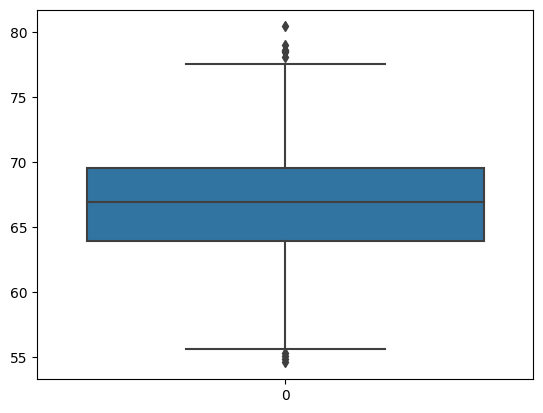

In [17]:
sns.boxplot(data=df["Height"])

<Axes: >

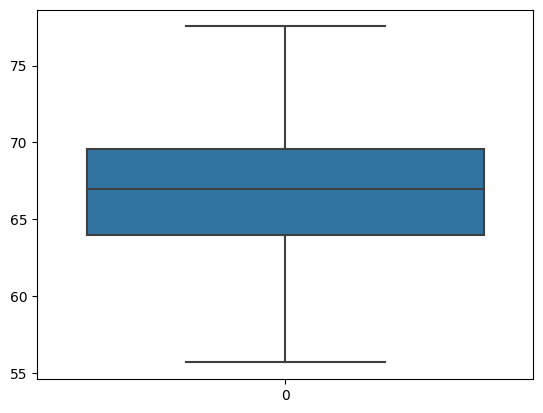

In [18]:
sns.boxplot(data=df_clean_data["Height"])

# **Histogram**
> A **histogram** is a graphical representation of a grouped frequency distribution with continuous classes.



In [19]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
len(df1)

8555

<Axes: xlabel='Weight', ylabel='Count'>

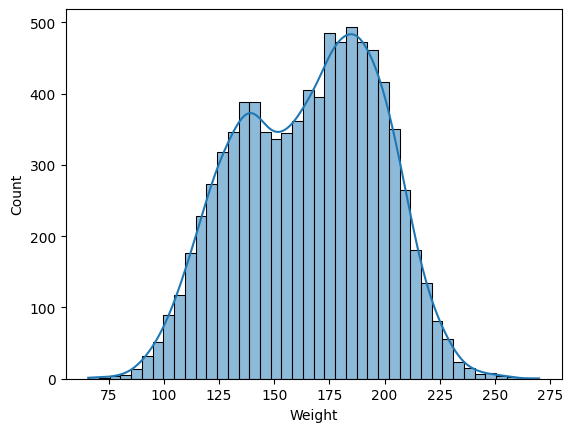

In [21]:
sns.histplot(df["Weight"],kde=True)

In [22]:
#Remove Outlier
mean_wt=df["Weight"].mean()
std_wt=df["Weight"].std()
std_neg_3 = mean_wt - (3*std_wt)
std_pos_3 = mean_wt + (3*std_wt)

In [23]:
df[df.Weight < std_neg_3]

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [24]:
df[df.Weight > std_pos_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [25]:
remove_out=df[(df.Weight<std_pos_3) & (df.Weight>std_neg_3)]
remove_out

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [26]:
len(df)

8555

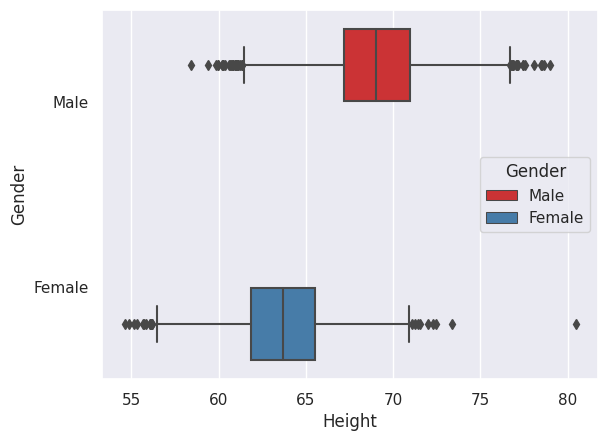

In [27]:
# Add a dark grid
sns.set(style="darkgrid")

# Create and display the plot
sns.boxplot(x="Height",
            y="Gender",
            hue="Gender",
            data=df,
            palette="Set1",
            width=0.8)
plt.show()

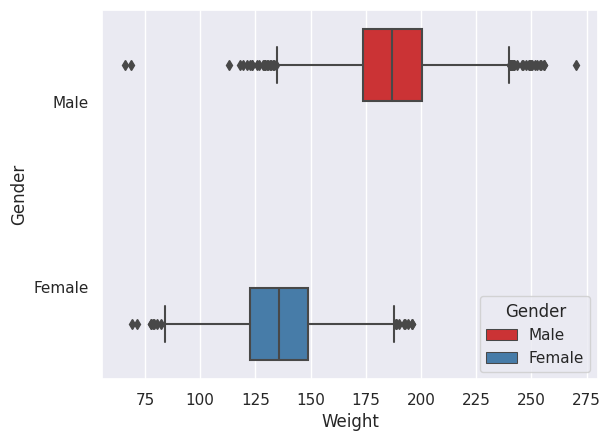

In [28]:
# Add a dark grid
sns.set(style="darkgrid")

# Create and display the plot
sns.boxplot(x="Weight",
            y="Gender",
            hue="Gender",
            data=df,
            palette="Set1",
            width=0.8)
plt.show()

# **Z-Score**
>A Z-Score is a statistical measurement of a score's relationship to the mean in a group of scores. A Z-score can reveal to a trader if a value is typical for a specified data set or if it is atypical. In general, a Z-score of -3.0 to 3.0 suggests that a stock is trading within three standard deviations of its mean.





In [29]:
df1['zscore']=(df1.Weight - df1.Weight.mean())/(df1.Weight.std())
df1.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664


In [30]:
df1[df1.zscore>3]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989698,3.256685


In [31]:
df1[df1.zscore < -3]

,Gender,Height,Weight,zscore
151,Male,65.350411,65.78000,-3.116121
160,Male,64.333648,68.64000,-3.026868
5360,Female,55.668202,68.98253,-3.016179
